# Etapa 1: Compreensão Inicial dos Dados

In [1]:
# Bibliotecas necessárias para o projeto

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Bibliotecas Classificadoras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Outras Bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/creditcard.csv', sep=',', encoding='UTF-8')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,...,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000,189999.000000
mean,67472.753699,-0.123262,0.011192,0.372657,0.087088,-0.132063,0.050776,-0.060121,0.021925,0.011903,...,-0.017942,-0.058597,-0.017657,0.005437,0.070404,0.007942,0.001779,0.002104,89.239816,0.001953
std,32573.999853,1.882621,1.619740,1.431349,1.391989,1.356669,1.306751,1.213169,1.212479,1.139985,...,0.739649,0.684510,0.604654,0.602432,0.483171,0.489305,0.392889,0.310538,248.106606,0.044146
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,43234.000000,-0.968508,-0.571526,-0.250238,-0.779422,-0.798475,-0.704009,-0.580287,-0.175384,-0.661807,...,-0.228079,-0.540579,-0.169167,-0.339337,-0.227662,-0.331227,-0.066777,-0.038392,5.990000,0.000000
50%,65122.000000,-0.115844,0.087002,0.533572,0.089263,-0.187758,-0.213408,-0.017549,0.047006,-0.075014,...,-0.046333,-0.044542,-0.031035,0.054482,0.114247,-0.060704,0.006817,0.019263,22.800000,0.000000
75%,84756.000000,1.203685,0.787105,1.247928,0.903544,0.436792,0.446211,0.487953,0.341655,0.630348,...,0.144500,0.405311,0.110240,0.419939,0.389045,0.264696,0.089266,0.078149,79.000000,0.000000
max,128643.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [4]:
df.isnull().sum().max()

np.int64(0)

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189999 entries, 0 to 189998
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    189999 non-null  float64
 1   V1      189999 non-null  float64
 2   V2      189999 non-null  float64
 3   V3      189999 non-null  float64
 4   V4      189999 non-null  float64
 5   V5      189999 non-null  float64
 6   V6      189999 non-null  float64
 7   V7      189999 non-null  float64
 8   V8      189999 non-null  float64
 9   V9      189999 non-null  float64
 10  V10     189999 non-null  float64
 11  V11     189999 non-null  float64
 12  V12     189999 non-null  float64
 13  V13     189999 non-null  float64
 14  V14     189999 non-null  float64
 15  V15     189999 non-null  float64
 16  V16     189999 non-null  float64
 17  V17     189999 non-null  float64
 18  V18     189999 non-null  float64
 19  V19     189999 non-null  float64
 20  V20     189999 non-null  float64
 21  V21     18

- Verificando se meus dados estão balancedos por meio da distribuição da Coluna class da amostra dos dados.

In [7]:
df['Class'].value_counts()


Class
0    189628
1       371
Name: count, dtype: int64

Text(0.5, 1.0, 'Class Distribuições \n (0: No Fraud | 1: Fraud)')

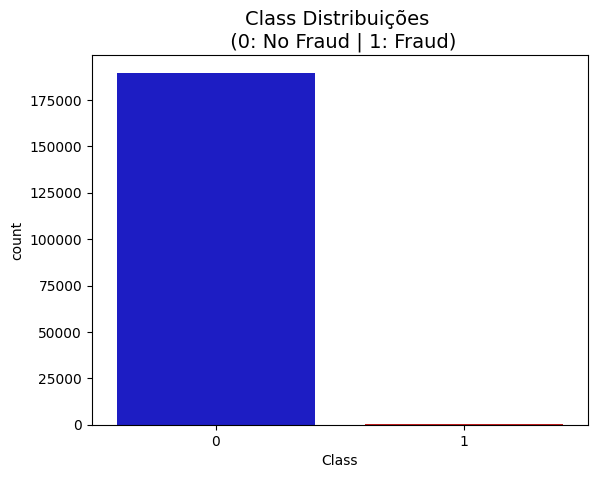

In [11]:
cores = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=cores)
plt.title('Class Distribuições \n (0: No Fraud | 1: Fraud)', fontsize=14)

In [12]:
class_counts = df['Class'].value_counts()
razão_desequilíbrio = class_counts.max() / class_counts.min()
print(f"Razão de desbalanceamento: {razão_desequilíbrio}")

Razão de desbalanceamento: 511.1266846361186


In [13]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% do conjunto de dados')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% do conjunto de dados')

No Frauds 99.8 % do conjunto de dados
Frauds 0.2 % do conjunto de dados


- Neste contexto, os resultados do comando mostram que a classe 0 ("No Frauds") possui 189.628 amostras, enquanto a classe 1 ("Frauds") conta com apenas 371 amostras, resultando em uma razão de desbalanceamento de 511. Uma razão de 10 ou mais é geralmente considerada um desbalanceamento elevado. Com esses números, podemos concluir que há um desbalanceamento extremo nos dados, já que a classe 0 é significativamente mais representativa do que a classe 1.
- Se usarmos esse dataframe como base para nossos modelos preditivos e análises, podemos obter muitos erros e nossos algoritmos provavelmente se ajustarão demais, pois "assumirão" que a maioria das transações não é fraude.

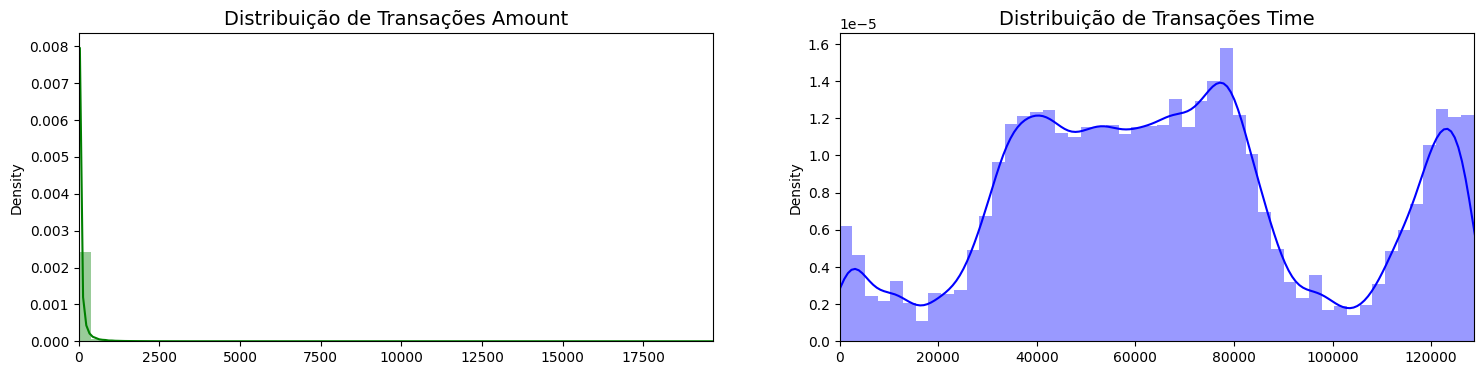

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='g')
ax[0].set_title('Distribuição de Transações Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribuição de Transações Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()


### Escala e Distribuição  

Nesta etapa do processo, vamos escalonar as colunas relacionadas ao **Tempo** e à **Quantidade**, aplicando o mesmo tratamento dado às demais variáveis do conjunto de dados. Além disso, criaremos uma subamostra balanceada, garantindo uma proporção igual de casos de fraudes e não fraudes. Isso ajudará os algoritmos a identificar com maior precisão os padrões que distinguem transações fraudulentas das legítimas.  

### O que é uma subamostra?  
Neste contexto, uma subamostra refere-se a um subconjunto do dataframe original com uma distribuição equilibrada de 50/50 entre transações fraudulentas e não fraudulentas. Em outras palavras, ela terá a mesma quantidade de registros para ambas as classes.  

### Por que criar uma subamostra?  
No início deste estudo, observamos que o conjunto de dados original apresentava um **desequilíbrio significativo** entre as classes. Trabalhar diretamente com esses dados desbalanceados pode gerar os seguintes problemas:  
- **Overfitting**: O modelo pode ser tendencioso, assumindo que a maioria das transações são legítimas. Nosso objetivo é garantir que o modelo seja capaz de identificar com precisão as fraudes, mesmo que ocorram em menor número.  
- **Correlação inadequada**: Embora não conheçamos o significado dos atributos "V", é importante analisar como cada um influencia o resultado (fraude ou não fraude). Com um conjunto desbalanceado, torna-se difícil identificar as correlações reais entre as variáveis e as classes.  

### Resumo do Processo  
1. **Escalonamento de Colunas**: Aplicamos a normalização aos valores das colunas de **Tempo** e **Quantidade**.  
2. **Criação da Subamostra**: Identificamos os 371 casos de fraude presentes no dataset original e selecionamos aleatoriamente 371 casos de não fraude.  
3. **Construção do Novo Dataset**: Concatenamos as transações fraudulentas e não fraudulentas, resultando em uma subamostra balanceada para análise e treinamento do modelo.  

Essa abordagem permitirá que os algoritmos de classificação tenham uma visão mais clara dos padrões associados às fraudes, aumentando a eficácia do modelo preditivo.


### 1.1 Estratégias para lidar com o desbalanceamento.

In [ ]:
# Como a maioria dos nossos dados já foi escalonado, devemos normalizar as colunas que ainda precisam (Amount e Time).
from sklearn.preprocessing import StandardScaler, RobustScaler



std_scaler = StandardScaler()   # StandardScaler pode ser usado para normalização padrão (média = 0 e desvio padrão = 1)
rob_scaler = RobustScaler()     # RobustScaler é menos sensível a outliers, pois usa mediana e intervalo interquartil (IQR).

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))   # Agora contêm os valores normalizados.
df['scaled_time']   = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))     # Agora contêm os valores normalizados.

df.drop(['Time', 'Amount'], axis=1, inplace=True) #  Removidas para evitar redundância no DataFrame.



In [18]:
# Realizando uma reorganização das colunas scaled_amount e scaled_time.
scaled_amount   = df['scaled_amount']
scaled_time     = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount e Time foram escalonadas!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.737022,-1.568373,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.275442,-1.568373,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.874127,-1.568349,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.379263,-1.568349,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.646350,-1.568325,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
